In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from models import ANN, pre_process_data

In [2]:
np.random.seed(1)

In [3]:
model_dir = "."
load = True
layers_dims = [128, 128, 10]

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

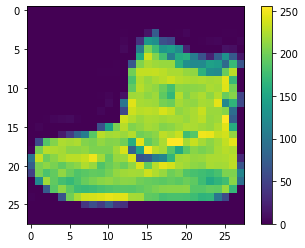

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

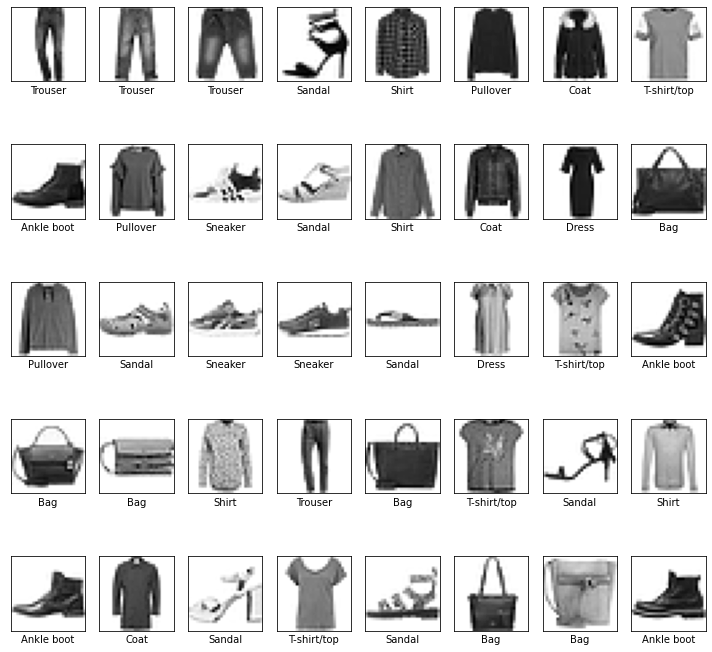

In [11]:
plt.figure(figsize=(10, 10), facecolor='w')
plt.subplots_adjust(hspace=0.1, wspace=0.1)
indices = np.arange(len(train_labels))
chosen_indices = np.random.choice(indices, size=40)
for j, i in enumerate(chosen_indices):
    plt.subplot(5,8, j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.tight_layout()
plt.show()

In [12]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label]),
                                  color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10), class_names, rotation=90)
    plt.ylabel("Probability")
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [13]:
ann = ANN(layers_dims, model_dir=model_dir, load=load)
ann.initialize_parameters()

Model loaded


In [14]:
train_x, train_y, test_x, test_y = pre_process_data(train_x=train_images, train_y=train_labels, test_x=test_images, test_y=test_labels)

In [15]:
predictions = ann.predict(test_x).T

In [16]:
prediction_array = ann.predict(test_x).T
prediction_class = np.argmax(prediction_array, axis=-1)
#print("Predict array: {}, {}".format(prediction_array, prediction_array.shape))
print("Predicted class: {}, grountruth class: {}".format(prediction_class, test_labels))

Predicted class: [9 2 1 ... 8 1 5], grountruth class: [9 2 1 ... 8 1 5]


In [17]:
predictions[0]

array([1.88678815e-05, 1.66241504e-07, 4.83671346e-05, 2.30989695e-05,
       9.60165137e-06, 9.92485610e-03, 1.12075128e-05, 7.95521716e-02,
       5.82387044e-04, 9.09829276e-01])

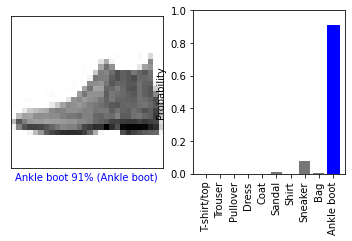

In [18]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

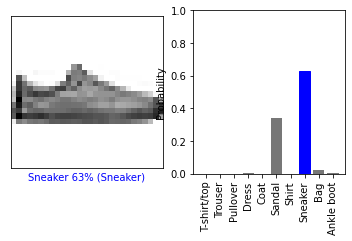

In [19]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

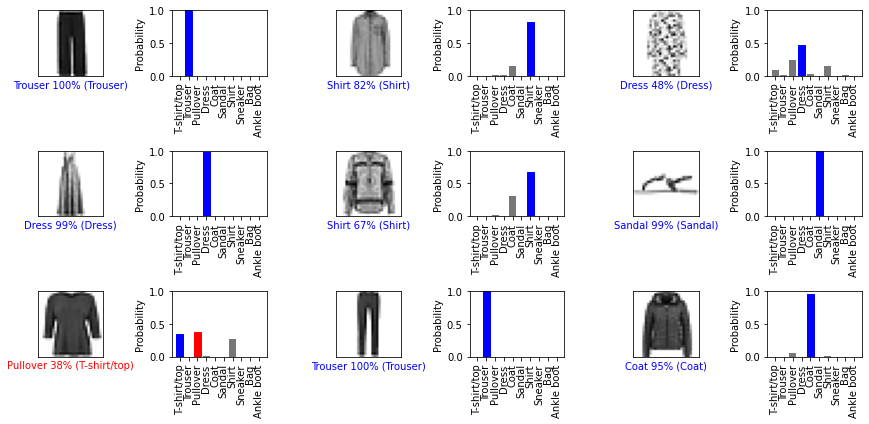

In [23]:
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
indices = np.arange(len(test_labels))
chosen_indices = np.random.choice(indices, size=num_images)
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for j, i in enumerate(chosen_indices):
  plt.subplot(num_rows, 2*num_cols, 2*j+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*j+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

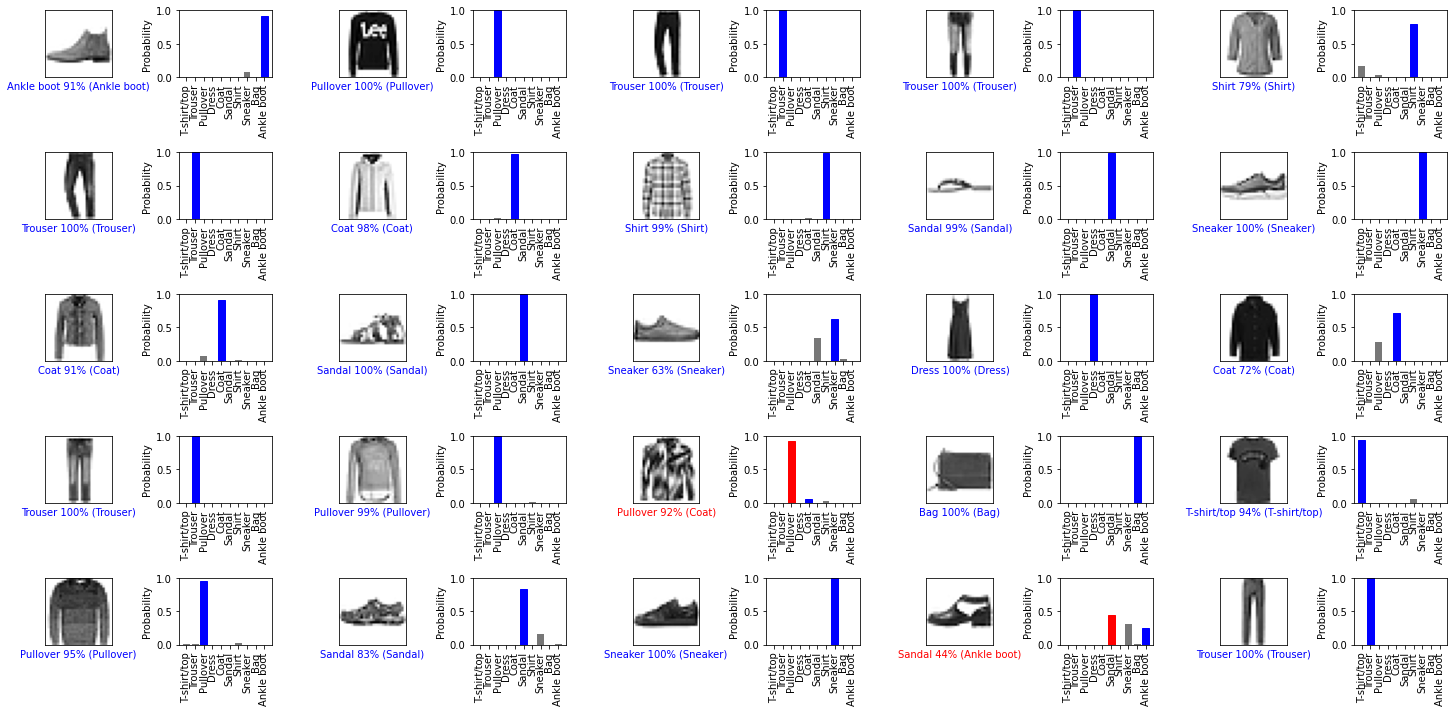

In [22]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()